# Classification Model for Predicting Outcomes

Task:

- Using a labeled dataset (e.g., from Kaggle), build and evaluate different classification models
(e.g., Logistic Regression, SVM, etc.). Compare their accuracy and precision in order to identify
the best model.

Description:
1. Introduction
This project aims to build and evaluate different classification models for predicting credit scores. 
By using various machine learning algorithms, I will identify the model that performs best in terms of 
accuracy and precision. The dataset used for this project is the "Credit Score Classification Dataset" from Kaggle.
link: https://www.kaggle.com/datasets/sujithmandala/credit-score-classification-dataset. 

This dataset contains information about a sample of over 100 people across the world. The data includes the following information:
Age
Gender
Income
Education
Marital Status
Number of Children
Home Ownership
Credit Score

2. Data Preprocessing
The dataset contained both numerical and categorical variables. To prepare the data for machine learning models, 
several preprocessing steps were performed:

- Label Encoding: Categorical variables such as Gender, Marital Status, Home Ownership, and Credit Score were encoded 
using LabelEncoder.

- Ordinal Encoding: The Education feature was encoded using OrdinalEncoder with an ordered list of educational qualifications (e.g., 
High School Diploma, Bachelor's Degree, Master's Degree, etc.) to preserve the natural order in the data.

- Train-Test Split: The dataset was split into a training set (80%) and a test set (20%) to evaluate the models on unseen data.

- Feature Scaling: The StandardScaler was applied to standardize the numerical features, ensuring that all features are on the same 
scale, which is important for models like Support Vector Machines (SVM).

3. Model Training and Evaluation
To evaluate multiple classification models, I used four popular algorithms:

Logistic Regression: A linear model for binary and multiclass classification that predicts the probability of an instance belonging to a class.
Support Vector Machine (SVM): A model that tries to find the optimal boundary (hyperplane) to separate classes.
Decision Tree: A tree-like model of decisions that splits the data into classes based on feature values.
Random Forest: An ensemble method that builds multiple decision trees and merges them to improve the accuracy and prevent overfitting.
Each model was trained on the training data and evaluated on the test data. The following metrics were used for evaluation:

Accuracy: The proportion of correctly predicted instances over the total instances.
Precision: The proportion of true positive predictions relative to the total positive predictions.

4. Visualization and results:

To visualize the data in a simplified form, I applied Principal Component Analysis (PCA). 
PCA reduced the dataset to two components, making it easier to visualize in two dimensions. 
This helped in understanding how well the training data could be separated into distinct classes.

A confusion matrix is a tool used to evaluate the performance of a classification model. 
Each row of the matrix represents the actual class, while each column represents the predicted class.
The rows (0, 1, 2) represent the true classes (actual values). The columns (0, 1, 2) represent the predicted classes.
The numbers within each cell indicate the count of samples that fall into that specific combination of actual and predicted classes.
The color intensity represents the frequency of predictions, where darker shades indicate higher values.

These models perform well, with most predictions falling along the diagonal, suggesting good accuracy for each class.

The results of the classification models are as follows:

- Logistic Regression: Accuracy: 0.94, Precision: 0.94
- SVM: Accuracy: 0.94, Precision: 0.94
- Decision Tree: Accuracy: 0.94, Precision: 0.96
- Random Forest: Accuracy: 0.94, Precision: 0.94

The Decision Tree model performed the best, achieving an accuracy of 94% and a precision score of 96%. 

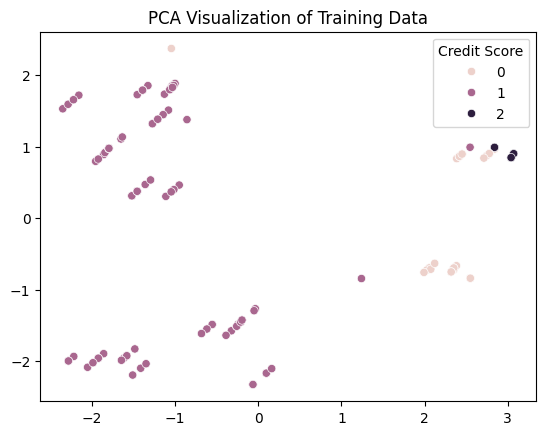

Logistic Regression - Accuracy: 0.94, Precision: 0.94


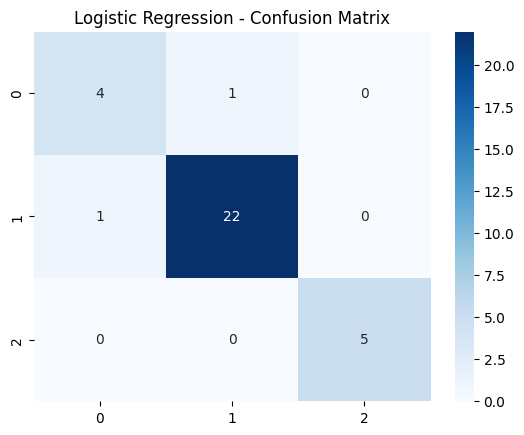

SVM - Accuracy: 0.94, Precision: 0.94


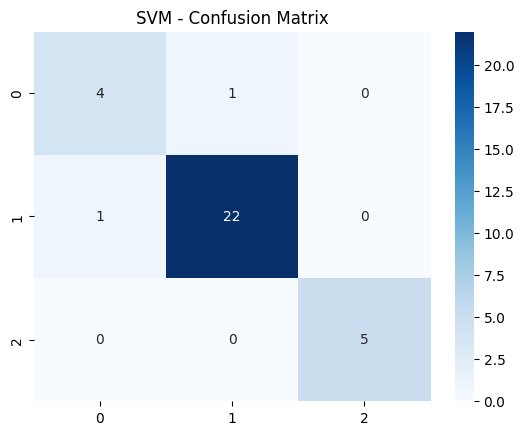

Decision Tree - Accuracy: 0.94, Precision: 0.96


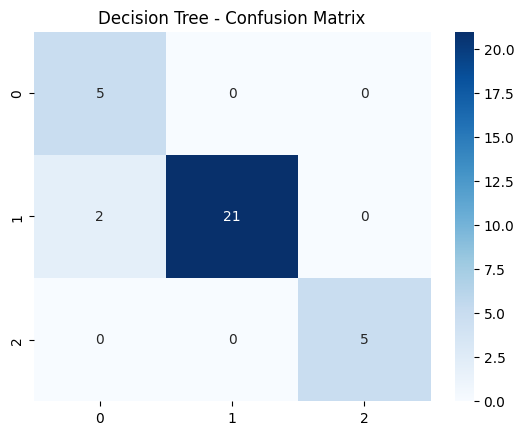

Random Forest - Accuracy: 0.94, Precision: 0.94


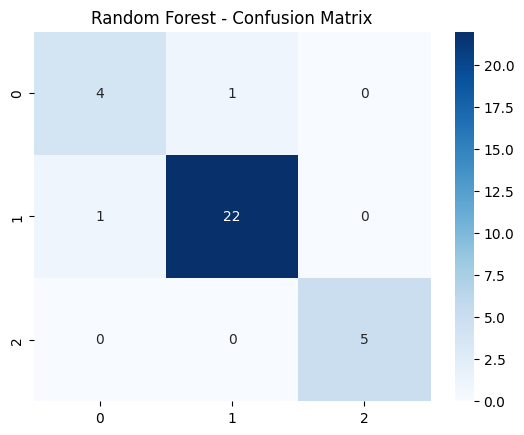

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Credit Score Classification Dataset.csv')

# Preprocessing steps
# Encode categorical variables
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Marital Status'] = LabelEncoder().fit_transform(data['Marital Status'])
data['Home Ownership'] = LabelEncoder().fit_transform(data['Home Ownership'])
data['Credit Score'] = LabelEncoder().fit_transform(data['Credit Score'])
education_order = [["High School Diploma", "Associate's Degree", "Bachelor's Degree", "Master's Degree", "Doctorate"]]
data['Education'] = OrdinalEncoder(categories=education_order).fit_transform(data[['Education']])
# Split data
X = data.drop('Credit Score', axis=1)
y = data['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dimensionality Reduction for understanding how well the training data could be separated into distinct classes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train)
plt.title("PCA Visualization of Training Data")
plt.show()

# Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()
